<img src="../imgs/CampQMIND_banner.png">

# Sequence Models <a class="anchor" id="top"></a>


Author: [Willem Atack](https://www.linkedin.com/in/willem-atack-076318153/)

A sequence model should be used any time that time is involved, or the events that occur are in a specific sequence. For example, when we are trying to predict X_n with knowledge of X_1 to X_n-1. Most often, this occurs in time series problems, i.e. where we are attempting to predict a value over time. Examples include, estimating sales of a store, the price of a stock, or predicting webtraffic at a future instance. This notebook walks through an example of an ARIMA model, and includes how time series problems should be approached. While ARIMA models are a statistical model, more complex macine learning methods like LSTM recurrent neural networks.

An ARIMA model has 5 components, giving ARIMA a (p,d,q) structure.

p = AR component (autoregressive) refers to how many lags the model will consider. For example, if we have monthly sales data and p = 5, then we will consider the last 5 months.

d = I component (integrated) refers to how many times the model needs to be differenced. We need the input data to be stationary (essentially means no overarching trend), which the ARIMA can take care of internally, using the d parameter. For example if have data that increases linearly, we need to difference it once so that it is flat, but if it is exponential or quadratic, we may need to difference it twice (think about how differencing a quadratic function twice would give us a constant function).

q = MA (moving average component) = number oflagged forecast errors it should consider.



Here is the example dataset I am using: https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv

In [18]:
# import libraries
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

# custom function so that we can parse the data and assign it arbitrary dates
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


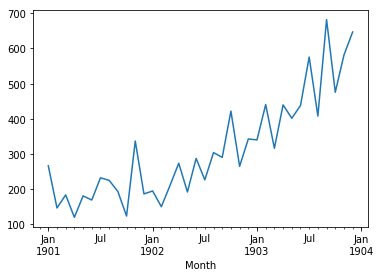

In [19]:
# download the dataset and update your pathfile to try this on your own

series = read_csv('/Users/Willem Atack/Documents/Coding/shampoo.csv',header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

pyplot.show()

Stationary data is data that has no clear trend, i.e. the rolling mean value of the data remains constant over time. Since this data is not stationary, since there is an upward trend, we need to make it stationary. This done by differencing (i.e. graphing the difference between the values as opposed to the values themselves).

A more sophisticated approach to confirming that differenced data is stationary involves using the adfuller test (easily found and implemented by searching it). If the test is not passed, the data may need to be differenced again.

We can also plot an autocorrelation plot of the series. This shows the correlation between a variable and it's lags.

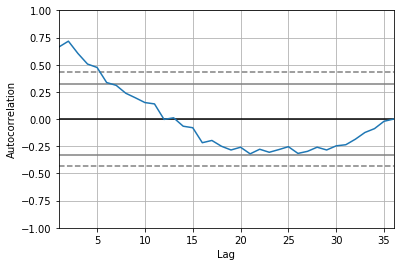

In [20]:
autocorrelation_plot(series)
pyplot.show()

In this example, it is clear that there is a positive correlation with the first 10 lags, and that this correlation is "significant" for the first 5 lags.

In ARIMA, the AR (autoregressive) component refers to how many lags will the model consider. This analysis suggests that perhaps we should include 5 lags, meaning AR = p = 5. Note for more detailed/better estimations try using the PACF (partial ACF test to determine p).

Since we said that we need to difference the data since there is a clear trend, let's try fitting a (5,1,0) ARIMA model.

c:\users\willem atack\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\willem atack\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\willem atack\appdata\local\programs\python\python36\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
c:\users\willem atack\appdata\local\programs\python\python36\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarnin

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Mon, 28 Sep 2020   AIC                            406.340
Time:                        13:59:38   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.001       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

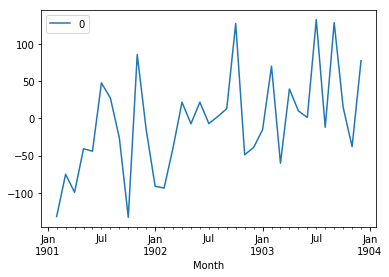

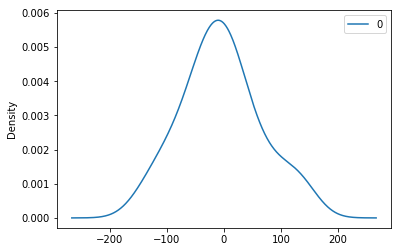

                0
count   35.000000
mean    -5.495183
std     68.132883
min   -133.296561
25%    -42.477865
50%     -7.186587
75%     24.748375
max    133.238011


In [23]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
# some more libraries^

model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

The above ARIMA summary shows that we are using five past lags, as well as a constant in our equation. These coefficients make up our model - which is essentially a linear regression with these parameters.

i.e. Predicted value = coef_lag5(lag5) +...+coef_lag1(lag1) + constant

We also plot the residual errors, and a density plot of these residual errors, which are Gaussian as we want, but not be cenetered at 0. In fact the average error is -5.495 as the summary shows. This means there is still some bias in the predictions as we have an average error that is negative. Since 5 were lags were considered significant, I would experiment with using q = 4 or 5 in the model to correct this.

c:\users\willem atack\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\willem atack\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\willem atack\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


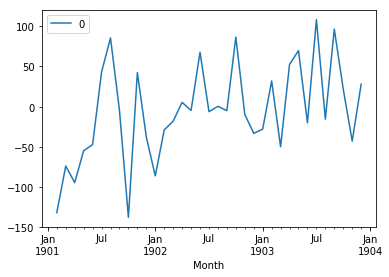

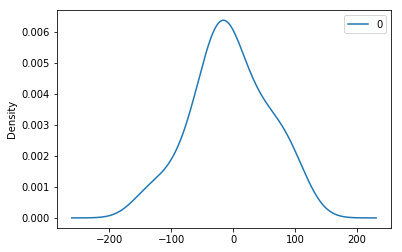

                0
count   35.000000
mean    -5.518079
std     60.768916
min   -137.529896
25%    -40.309428
50%     -6.270933
75%     37.097415
max    107.989986


In [36]:
new_model = ARIMA(series, order=(5,1,4))
new_model_fit = new_model.fit(disp=0)


# plot residual errors
residuals = DataFrame(new_model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

Note: this does not always work out well, as here we see the residual mean actually increased slightly. This means there may be a differncing related issues. Data science involves a lot of experimenting and testing different parameters, but hopefully this gives you an intuition on how to attack a problem.

Finally, we can use ARIMA to forecast future values using the forecast() function. We split dataset into training and testing sets, use the train set to fit the model, and generate a prediction for each element in the test set.

c:\users\willem atack\appdata\local\programs\python\python36\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
c:\users\willem atack\appdata\local\programs\python\python36\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
c:\users\willem atack\appdata\local\programs\python\python36\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing i

predicted=349.117734, expected=342.300000
predicted=306.513002, expected=339.700000
predicted=387.376436, expected=440.400000
predicted=348.154209, expected=315.900000
predicted=386.308798, expected=439.300000
predicted=356.082063, expected=401.300000
predicted=446.379484, expected=437.400000
predicted=394.737309, expected=575.500000
predicted=434.915469, expected=407.600000
predicted=507.923369, expected=682.000000
predicted=435.482710, expected=475.300000
predicted=652.743868, expected=581.300000
predicted=546.343505, expected=646.900000
Test MSE: 6958.328


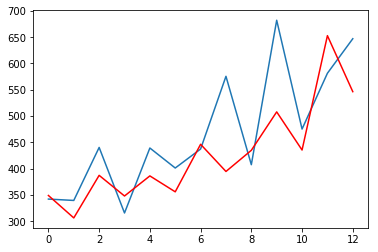

In [37]:
# another library
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

We can also calculate a final mean squared error score (MSE) for the predictions, providing a point of comparison for other ARIMA configurations. This metric will allow us to know if we are improving hte model!

In summary, here are the steps to creating an ARIMA mdoel for sequence/time-series analysis:
1. Perform analysis to identify trends, seasonality (note a SARIMA model is needed in this case) to get an idea of what the parameters should be.
2. Experiment with different parameters and compare summary stats.
3. Use plots, metrics and statistical tests to determine the success of the model and identify what is not captured by the model. Then you may need to return to step 1. Data science is iterative!

[Return to top](#top)